# AWS SNS



So we'll create SNS, Lambda will be publisher (and will trigger it using EventBridge scheduler), and we'll have two subscribers, SQS queue and an email.

## SNS

First create SNS. Next IAM role (add `SNSPublishManagedPolicy` to the IAM role and assign to Lambda).

arn:aws:sns:us-east-1:145924710759:ReminderTopic

arn:aws:lambda:us-east-1:145924710759:function:ReminderFunction

```python
import json
import boto3

def lambda_handler(event, context):
   client = boto3.client('sns')
   Topic_ARN = "<SNS Topic ARN Here>"
   response_one = client.publish (
      TargetArn = Topic_ARN,
      Message = json.dumps({'Reminder-Type': "Weekly Reminder", 'Reminder': "Reminder 1", 'Destination': "Email" }),
   )
   response_two = client.publish (
      TargetArn = Topic_ARN,
      Message = json.dumps({'Reminder-Type': "Weekly Reminder", 'Reminder': "Reminder 2", 'Destination': "Email"}),
   )
   response_three = client.publish (
      TargetArn = Topic_ARN,
      Message = json.dumps({'Reminder-Type': "Daily Reminder", 'Reminder': "Reminder 3", 'Destination': "SQS"}),
   )
   return {
      'statusCode': 200,
      'body': json.dumps({'response_one': response_one, 'response_two': response_two, 'response_three': response_three })
   }
   ```

### Publish 

By default, only the owner of the SNS topic can publish messages to the topic, so we need to change SNS access policy: 

```
{
  "Version": "2012-10-17",
  "Id": "ReminderID",
  "Statement": [
    {
      "Sid": "SNS topic policy",
      "Effect": "Allow",
      "Principal": {
        "Service": "lambda.amazonaws.com"
      },
      "Action": "SNS:Publish",
      "Resource": "<Provide Lambda Function ARN>",
      "Condition": {
        "StringEquals": {
          "aws:SourceAccount": "<Provide Account ID without Dashes>"
        }
      }
    }
  ]
}
```

## Subscribe

We will subscribe SQS and Email. Add them under SNS subscribers tab.

arn:aws:sqs:us-east-1:145924710759:ReminderQueue

arn:aws:sns:us-east-1:145924710759:ReminderTopic

## Schedule EventBridge to invoke Lambda

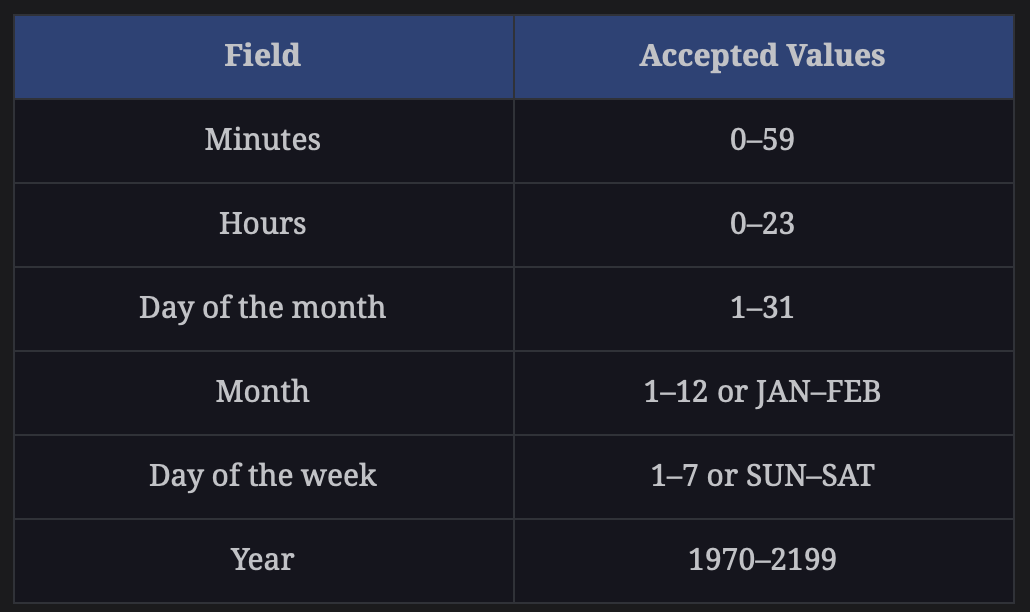

| datetime | cron |
| -------- | ---- |
|  | cron(minutes hours "day of the month" month "day of the week" year) | 
| 27th December, 2023. AT 5:00 PM | cron(0 17 27 DEC ? 2023) |
| Every 30 minutes on every Sunday | cron(30 * ? * SUN *) |
| Every Monday to Friday, At 8:30 PM | cron(30 20 ? * MON-FRI *)